# 第七章 建立一个自己的RAG机器人


<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#第七章-建立一个自己的RAG机器人" data-toc-modified-id="第七章、建立一个自己的RAG机器人">第七章、建立一个自己的RAG机器人</a></span></li>
        <li><span><a href="#一引言" data-toc-modified-id="一、引言">一、引言</a></span></li>
        <li><span><a href="#二处理内容展示" data-toc-modified-id="二、处理内容展示">二、处理内容展示</a></span>
            <ul class="toc-item">
                <li><span><a href="#21-项目论文展示" data-toc-modified-id="2.1 项目论文展示">2.1 项目论文展示</a></span></li>
                <li><span><a href="#22-PPT页面展示" data-toc-modified-id="2.2 PPT页面展示">2.2 PPT页面展示</a></span></li>
                <li><span><a href="#23-项目github-readme展示" data-toc-modified-id="2.3 项目github readme展示">2.3 项目github readme展示</a></span></li>
            </ul>
        </li>
        <li><span><a href="#三PDF文档meta元素制作" data-toc-modified-id="三、PDF文档meta元素制作">三、PDF文档meta元素制作</a></span></li>
        <li><span><a href="#四PDF过滤和合并语料库" data-toc-modified-id="四、PDF过滤和合并语料库">四、PDF过滤和合并语料库</a></span>
            <ul class="toc-item">
                <li><span><a href="#41-过滤引用部分" data-toc-modified-id="4.1 过滤引用部分">4.1 过滤引用部分</a></span></li>
                <li><span><a href="#42-过滤标题" data-toc-modified-id="4.2 过滤标题">4.2 过滤标题</a></span></li>
            </ul>
        </li>
        <li><span><a href="#五处理其他文件" data-toc-modified-id="五、处理其他文件">五、处理其他文件</a></span>
            <ul class="toc-item">
                <li><span><a href="#51-处理ppt" data-toc-modified-id="5.1 处理ppt">5.1 处理ppt</a></span></li>
                <li><span><a href="#52-处理readme文件" data-toc-modified-id="5.2 处理readme文件">5.2 处理readme文件</a></span></li>
            </ul>
        </li>
        <li><span><a href="#六搭建文件处理机器人" data-toc-modified-id="六、搭建文件处理机器人">六、搭建文件处理机器人</a></span>
            <ul class="toc-item">
                <li><span><a href="#61数据准备" data-toc-modified-id="6.1数据准备">6.1 数据准备</a></span></li>
                <li><span><a href="#62-向量数据库准备" data-toc-modified-id="6.2 向量数据库准备">6.2 向量数据库准备</a></span></li>
                <li><span><a href="#63多文档查询RAGbot-搭建" data-toc-modified-id="6.3多文档查询RAGbot 搭建">6.3 多文档查询RAGbot 搭建</a></span></li>
                <li><span><a href="#64-指定文档查询" data-toc-modified-id="6.4 指定文档查询">6.4 指定文档查询</a></span></li>
            </ul>
        </li>
    </ul>
</div>

## 一、引言
本次课程介绍了如何整合PDF、PowerPoint和Markdown文档，构建一个Ragbot，并使用语料库进行对话。视频内容包括文档预处理、元数据过滤、文档加载到向量数据库、嵌入文档、设置检索器和提示模板，以及与LLM进行对话等步骤。通过视频，观众可以学习如何构建自己的Ragbot，并对文档进行查询和交互。
1. 构建Ragbot并处理文档

这节课将教大家如何整合先前学到的技巧，构建一个Ragbot，使用包含PDF、PowerPoint和Markdown文档的语料库。我们预处理所有文档类型，并将它们加载到向量数据库中，查询数据库并将结果插入提示中，传递给LLM进行对话。我们可以导入辅助函数，预处理PDF并过滤掉不需要的内容。最终我们可以查询表格和元数据对象的文本。

2. 过滤和合并语料库

本章节介绍如何通过父ID元数据字段找到参考文献部分的元素，并过滤掉页眉信息，最终预处理幻灯片和Markdown文件后合并为单个语料库，并在向量数据库中搜索特定文件类型的内容。

3. 加载文档并进行搜索

本章节介绍了如何使用LangChain的Karama数据库对象上的FromDocuments方法加载文档，并将它们嵌入到Chroma向量数据库中。然后设置检索器进行搜索，以及设置提示模板，最后可以进行对话查询和混合搜索，从而实现对文档的分类和信息提取。

- 注意咯~本节内容是本次学习最难也应用性最强的小节，如果觉得困难请再学学前面的内容补补课~如果你是大佬觉得本节内容学完没压力，那么恭喜你已经完全掌握了非结构数据的处理思路。

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>Note <code>(Kernel Starting)</code>:</b> 你可以一边调用本笔记实验，一边看视频学习知识。</p>


In [2]:
# 警告控制
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 安装依赖
from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

from unstructured.chunking.title import chunk_by_title
from unstructured.partition.md import partition_md
from unstructured.partition.pptx import partition_pptx
from unstructured.staging.base import dict_to_elements

import chromadb

In [4]:
# 配置API key和URL

# 到这里申请非结构化处理库的api：   https://app.unstructured.io/keys


DLAI_API_KEY = ""
DLAI_API_URL = "https://api.unstructuredapp.io"

# 启动服务器
s = UnstructuredClient(
    api_key_auth=DLAI_API_KEY,
    server_url=DLAI_API_URL,
)

## 二、处理内容展示

这里是处理内容展示，项目是Donut模型，模型是对文档做OCR的一个项目。关联的数据包括论文、演讲PPT以及Github项目的md文档。


### 2.1 项目论文展示

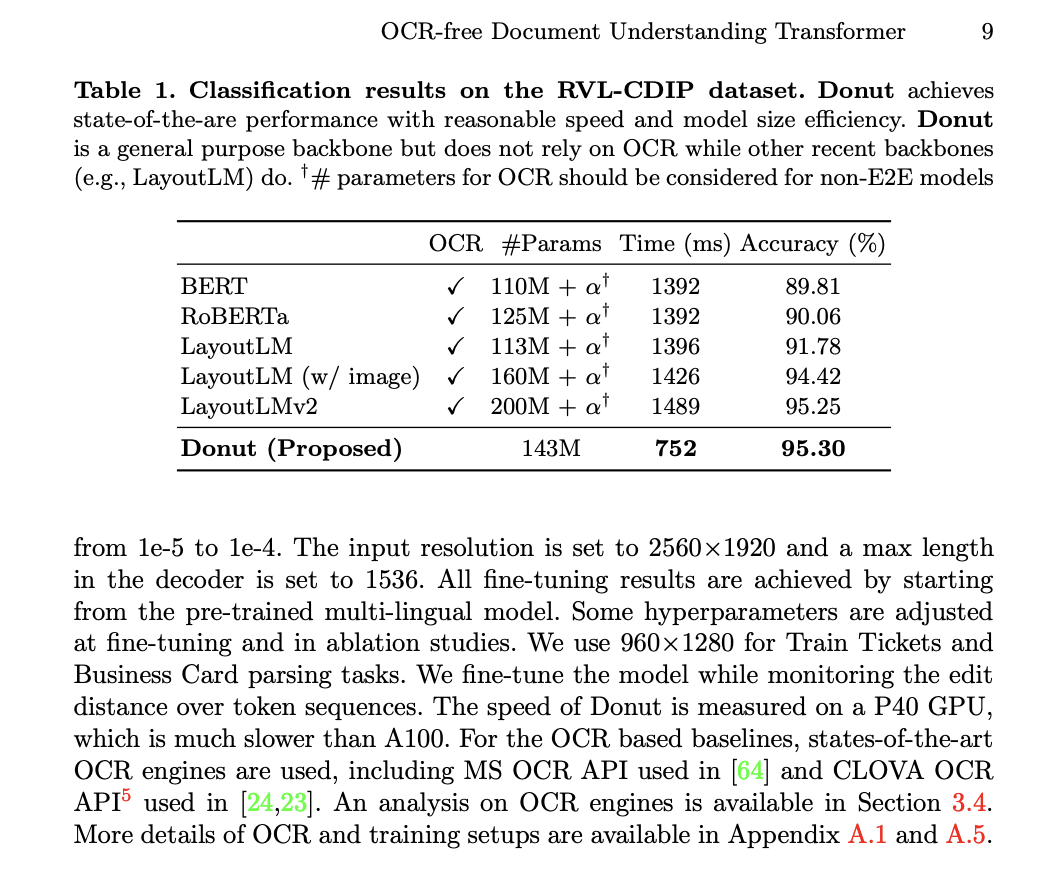

In [76]:
from IPython.display import Image
Image(filename='images/7-1.png', height=400, width=400)

### 2.2 PPT页面展示

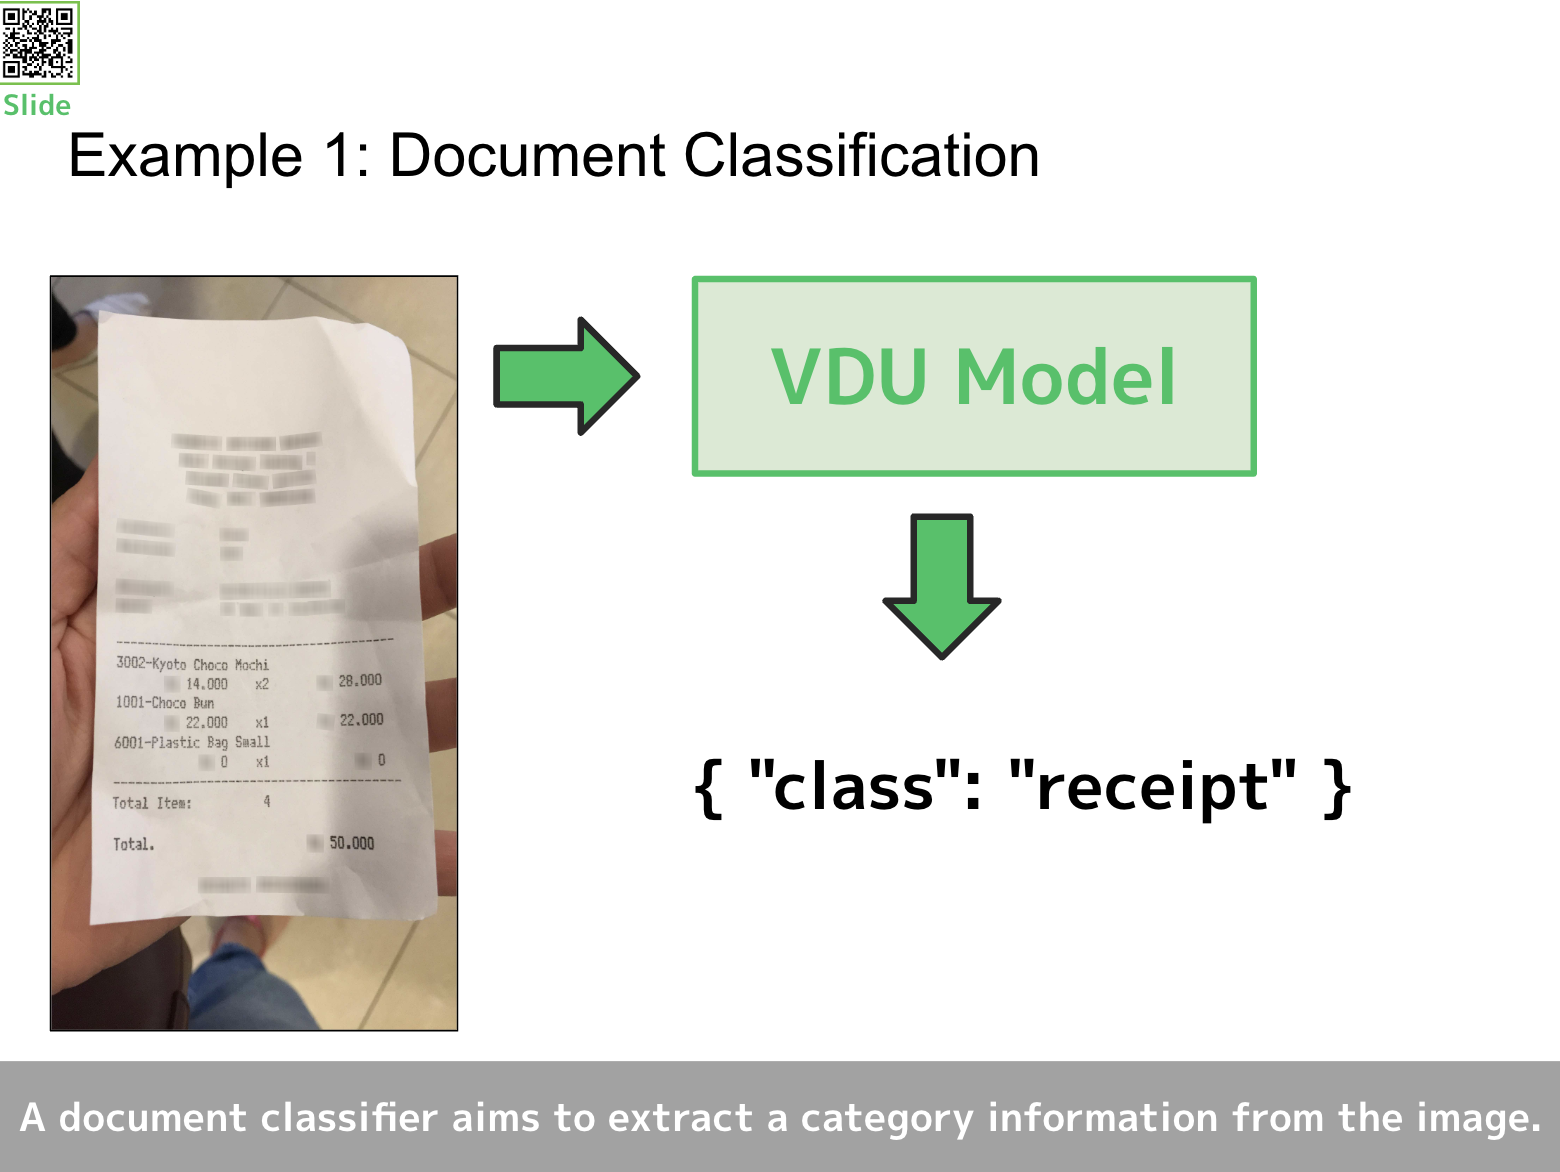

In [77]:
Image(filename='images/7-2.png', height=400, width=400) 

### 2.3 项目github readme展示

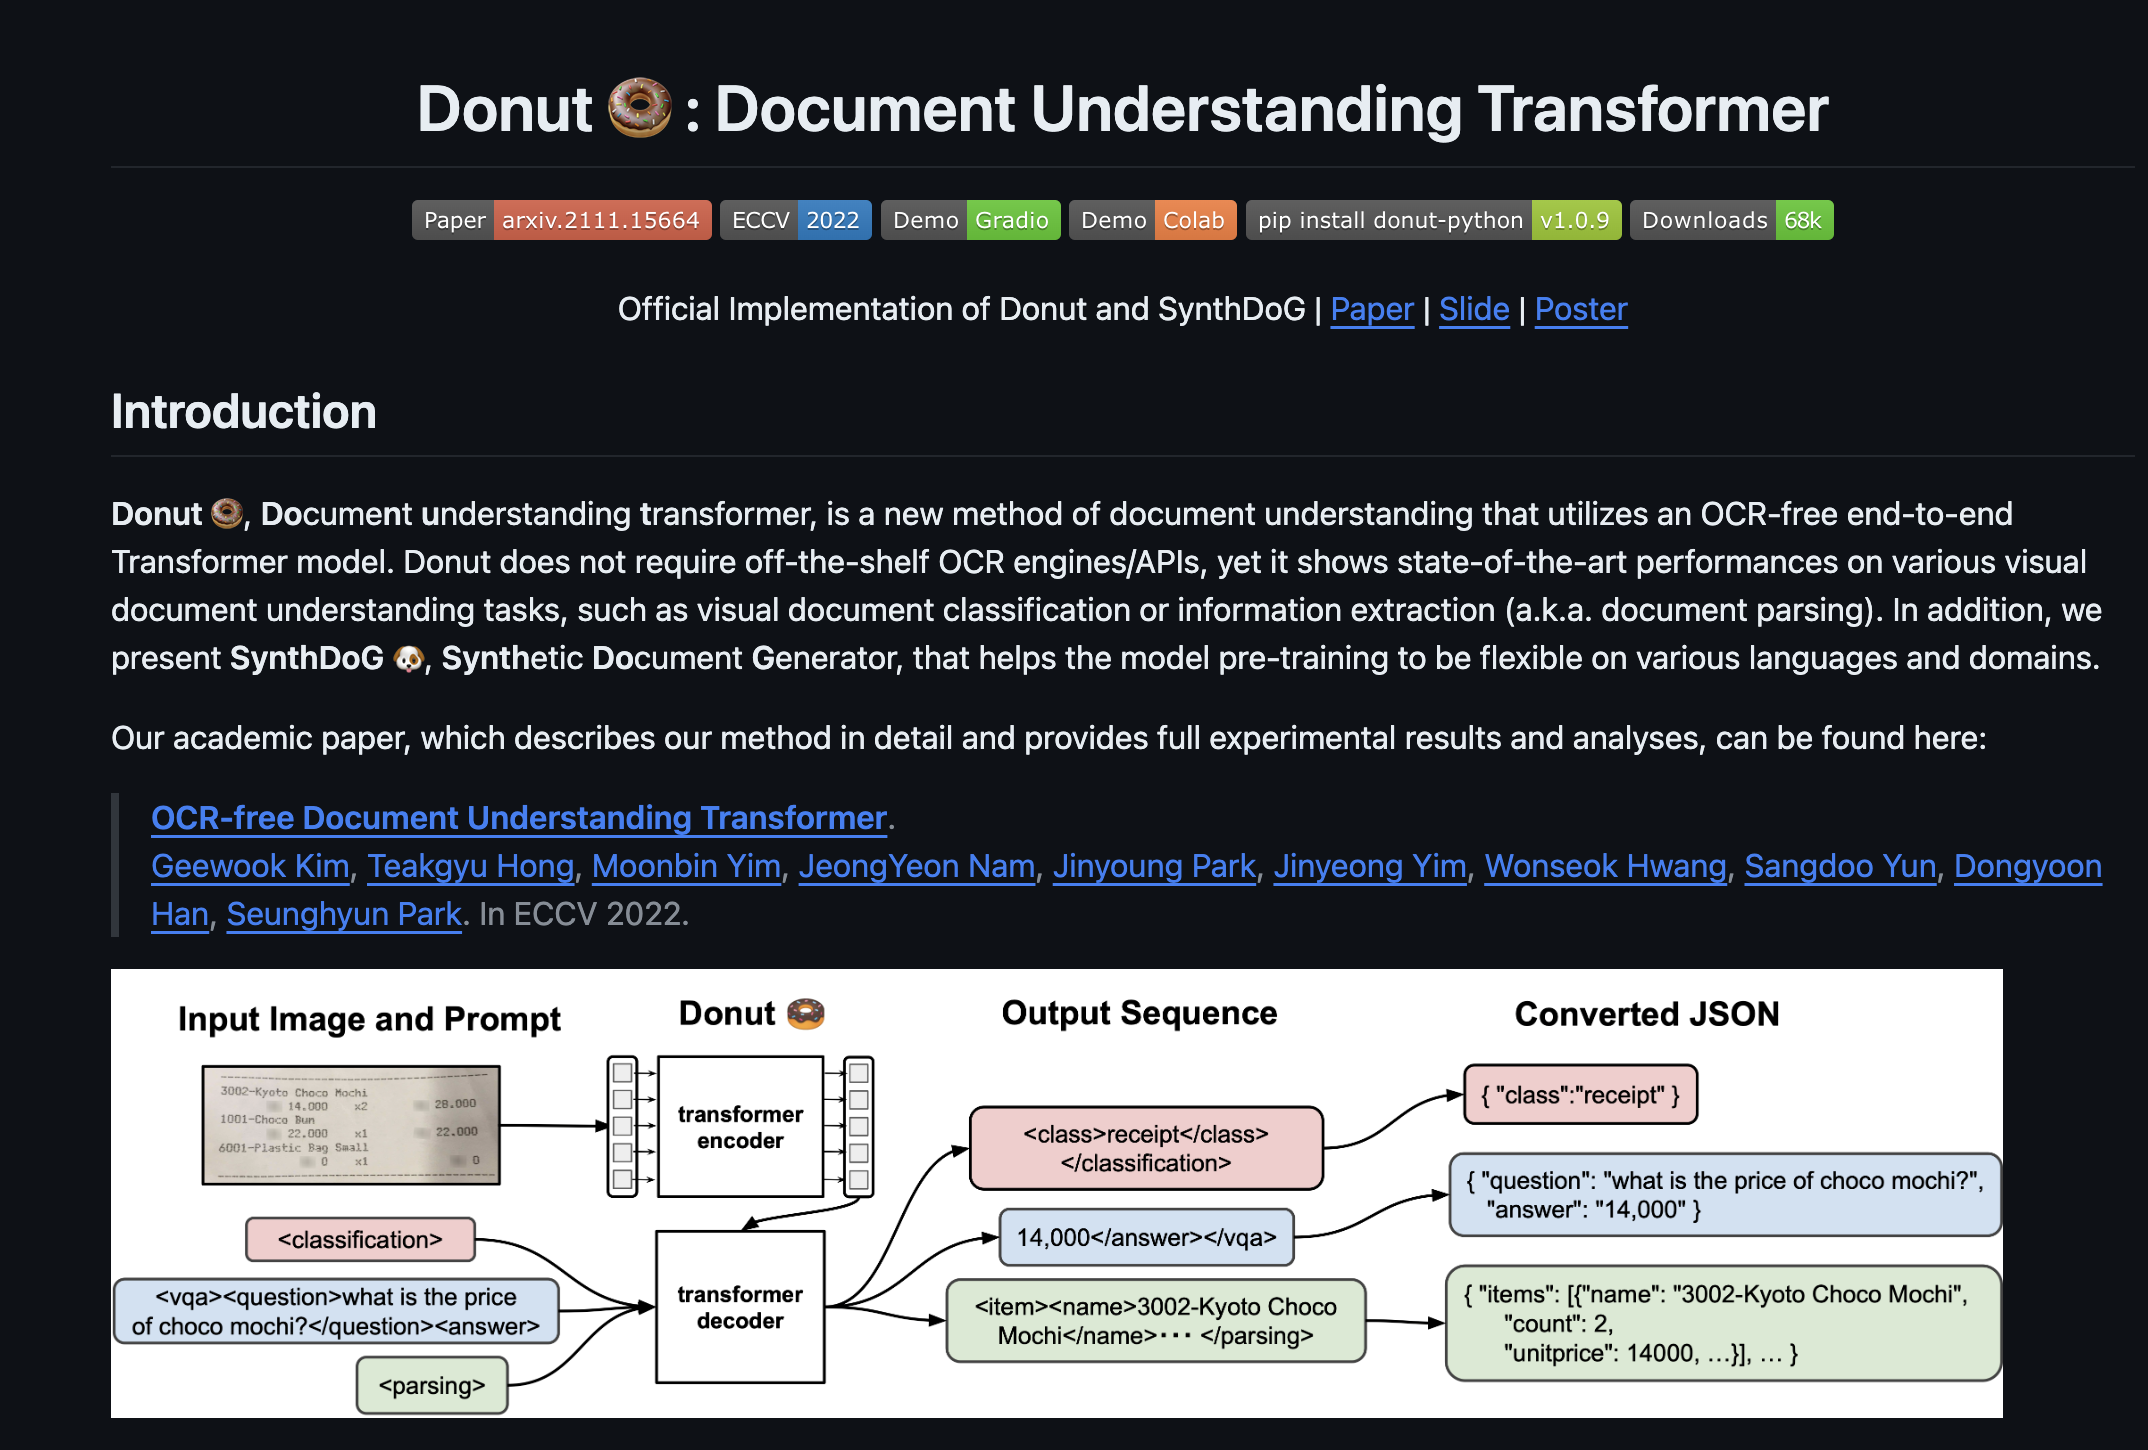

In [11]:
Image(filename='images/7-3.png', height=600, width=600) 

## 三、PDF文档meta元素制作

<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"> ⏳ <b>处理PDF文档需要花费一定的时间（3分钟左右），请耐心等待。</p>

In [14]:
filename = "example_files/donut_paper.pdf"

with open(filename, "rb") as f:
    # 将文件导入到共享存储中，也就是unstructured_client的shared中，以file类存储
    files=shared.Files(
        content=f.read(),
        file_name=filename,
    )

# 调用unstructured_client的API，将文件分割成元素，并返回分割结果
req = shared.PartitionParameters(
    files=files,
    strategy="hi_res",
    hi_res_model_name="yolox",
    pdf_infer_table_structure=True,
    skip_infer_table_types=[],
)

try:
    # s为unstructured_client的service，用于调用unstructured_client的API
    resp = s.general.partition(req)
    # 将分割结果转换为Elements（元素）对象
    pdf_elements = dict_to_elements(resp.elements)
except SDKError as e:
    print(e)

我们本次处理的目标文件就是Donut模型的原始论文。处理完后我们查阅第一个元素，是论文的标题。
可以看到在元素的text中存放的是论文的标题

In [15]:
pdf_elements[0].to_dict()

{'type': 'Title',
 'element_id': '59a9f0edd370eaa8c5c59cd9256e63bd',
 'text': 'OCR-free Document Understanding Transformer',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 1,
  'filename': 'donut_paper.pdf'}}

这里我们也能看到一些table类型的元素

In [16]:
tables = [el for el in pdf_elements if el.category == "Table"]

我们抽取第一个table，存储为html类型展示

In [17]:
table_html = tables[0].metadata.text_as_html

In [18]:
from io import StringIO 
from lxml import etree

# etree.XMLParser(remove_blank_text=True) 用于去除空白字符
parser = etree.XMLParser(remove_blank_text=True)
# StringIO 用于将字符串转换为文件对象
file_obj = StringIO(table_html)
# etree.parse 用于解析文件对象
tree = etree.parse(file_obj, parser)
print(etree.tostring(tree, pretty_print=True).decode())

<table>
  <thead>
    <th>NAVER CLOVA</th>
    <th>2NAVER Search</th>
    <th>3SNAVER AI Lal</th>
  </thead>
</table>



打印后的效果如下：

<table>
  <thead>
    <th>NAVER CLOVA</th>
    <th>2NAVER Search</th>
    <th>3SNAVER AI Lal</th>
  </thead>
</table>

## 四、PDF过滤和合并语料库
我们在处理文档时有一些不必要的内容，这时我们需要删除他们。比如在这篇论文中摘要对我们搜索的影响不大，并且有可能有负面影响。这时候我们需要删除摘要部分，怎么去实现呢？可以看看下面的工作。

### 4.1 过滤引用部分

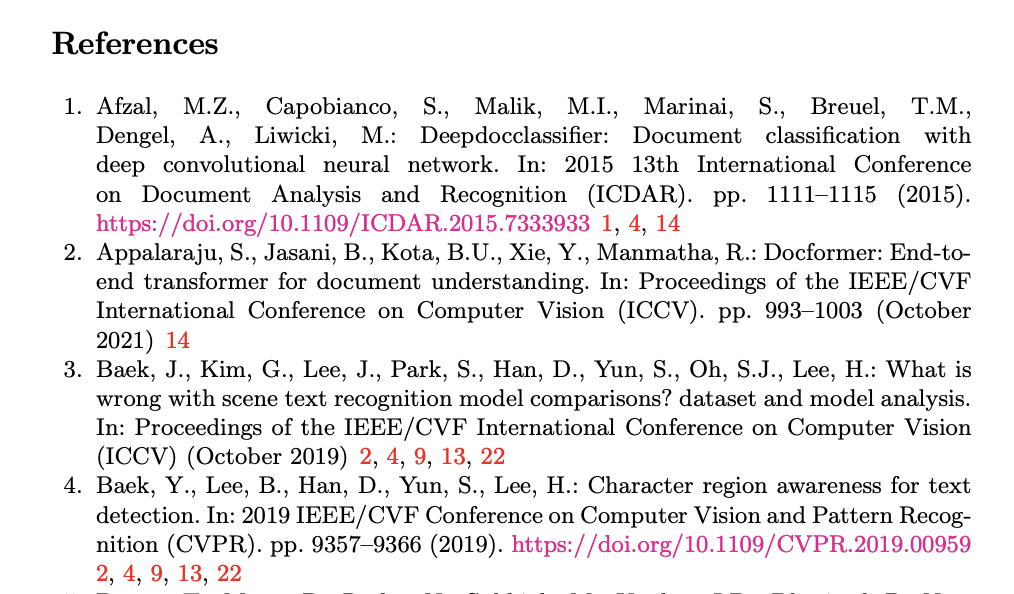

In [78]:
Image(filename='images/7-4.png', height=400, width=400) 

In [20]:
# 首先我们需要查询到摘要部分的父类ID，我们知道摘要部分的文档关键字是“References”，同时在PDF中“References”字样类型是“Title”。那我们可以通过下面的写法找到摘要标题对应的元素。
reference_title = [
    el for el in pdf_elements
    if el.text == "References"
    and el.category == "Title"
][0]

In [21]:
reference_title.to_dict()

{'type': 'Title',
 'element_id': '05db3e5dd95df32622138973f0d4b9ed',
 'text': 'References',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 15,
  'parent_id': 'f6fdb355e327d011494e182b9f994661',
  'filename': 'donut_paper.pdf'}}

{'type': 'Title',
 'element_id': '05db3e5dd95df32622138973f0d4b9ed',
 'text': 'References',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 15,
  'parent_id': 'f6fdb355e327d011494e182b9f994661',
  'filename': 'donut_paper.pdf'}}

  在返回值中我们可以看到 References 作为元素的名称，属性是“Title”。我们可以找到这个父类元素。通过.id方法可以轻松拿到父类元素ID。

In [22]:
references_id = reference_title.id

那我们定位出所有父类ID为引用的子元素，即可定位出所有的引用内容部分。



In [23]:
for element in pdf_elements:
    if element.metadata.parent_id == references_id:
        print(element)
        break

1. Afzal, M.Z., Capobianco, S., Malik, M.I., Marinai, S., Breuel, T.M., classification with Dengel, A., Liwicki, M.: Deepdocclassifier: Document deep convolutional neural network. In: 2015 13th International Conference on Document Analysis and Recognition (ICDAR). pp. 1111–1115 (2015). https://doi.org/10.1109/ICDAR.2015.7333933 1, 4, 14


1. Afzal, M.Z., Capobianco, S., Malik, M.I., Marinai, S., Breuel, T.M., classification with Dengel, A., Liwicki, M.: Deepdocclassifier: Document deep convolutional neural network. In: 2015 13th International Conference on Document Analysis and Recognition (ICDAR). pp. 1111–1115 (2015). https://doi.org/10.1109/ICDAR.2015.7333933 1, 4, 14

In [24]:
pdf_elements = [el for el in pdf_elements if el.metadata.parent_id != references_id]

在这里我们只需要过滤一遍所有元素，把id属于引用的都删除即可。

### 4.2 过滤标题

这里的标题不单只题目，主要处理页面的页眉信息，如果不做处理会影响内容的连贯性，进而影响RAG的效果。
处理方案和处理引用一致，不过多赘述。

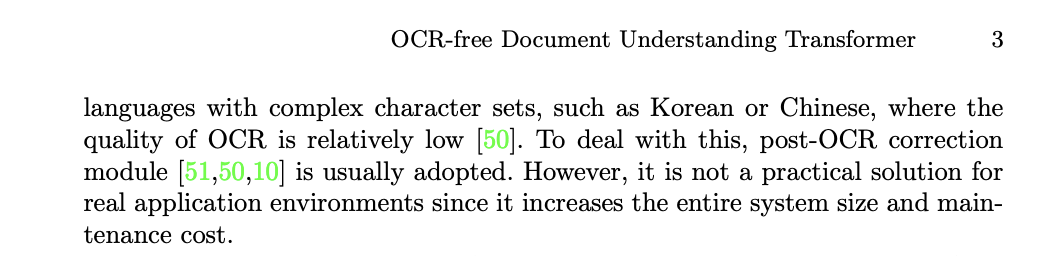

In [26]:
Image(filename='images/7-5.png', height=400, width=400) 

In [27]:
headers = [el for el in pdf_elements if el.category == "Header"]

In [28]:
headers[1].to_dict()

{'type': 'Header',
 'element_id': 'a4b916e36299d9c6f3f676a6480f550c',
 'text': 'OCR-free Document Understanding Transformer',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 3,
  'filename': 'donut_paper.pdf'}}

In [29]:
pdf_elements = [el for el in pdf_elements if el.category != "Header"]

## 五、处理其他文件
这里和之前课程一样，使用非结构化数据开源库对ppt分区

### 5.1 处理ppt

In [30]:
filename = "example_files/donut_slide.pptx"
pptx_elements = partition_pptx(filename=filename)

### 5.2 处理readme文件
使用非结构化数据开源库对ppt分区

In [31]:

filename = "example_files/donut_readme.md"

In [32]:
md_elements = partition_md(filename=filename)

## 六、搭建文件处理机器人
### 6.1 数据准备

In [ ]:
# 单个文档按标题进行分块
elements = chunk_by_title(pdf_elements + pptx_elements + md_elements)

### 6.2 向量数据库准备

In [35]:
# 使用langchain制作RAG系统，这里引入必要的库文件。
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

In [36]:
# 对与处理后的element进行清洗，删除language字段，更新source字段，将每个元素加载到langchain的Document块中。

documents = []
for element in elements:
    # element.meatdata.to_dict() 方法可以获取元素的元数据信息，并转换为字典格式
    metadata = element.metadata.to_dict()
    # 去掉元数据中的 languages 字段，因为 RAG 机器人不支持多语言
    del metadata["languages"]
    # 增加一个 source 字段，用于记录元素的来源文件名
    metadata["source"] = metadata["filename"]
    # 构造 Document 对象，并添加到 documents 列表中
    documents.append(Document(page_content=element.text, metadata=metadata))

In [75]:
# 填写你的OPENAI_API_KEY 因为会用到openai的api 包括llm模型及embedding模型
OPENAI_API_KEY="sk-"

In [63]:
# 配置embedding模型
embeddings = OpenAIEmbeddings(openai_api_key=OPENAI_API_KEY)

In [54]:
# 创建向量数据库
vectorstore = Chroma.from_documents(documents, embeddings)

In [55]:
# 设置检索器在向量数据库搜索，通过相似性搜索规则，通过配置“k”：6 参数，可以检索到6个最相似的内容。
retriever = vectorstore.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 6}
)

### 6.3 多文档查询RAGbot 搭建

In [41]:
# 导入langchain相关库
from langchain.prompts.prompt import PromptTemplate
from langchain_openai import OpenAI
from langchain.chains import ConversationalRetrievalChain, LLMChain
from langchain.chains.qa_with_sources import load_qa_with_sources_chain

In [56]:
# 编写prompt模版
template = """你是一个AI助手，负责回答关于Donut文档理解模型的问题。
给你一份长文件的以下摘录部分和一个问题。提供一个对话式的回答。
如果你不知道答案，就说“嗯，我不确定。”不要试图编造答案。
如果问题不是关于Donut的，礼貌地告诉他们你只会回答关于Donut的问题。
问题:{question}
=========
{context}
=========
Answer in Markdown:"""
prompt = PromptTemplate(template=template, input_variables=["question", "context"])

In [67]:
# 配置langchain检索链，如果你对这里的内容不理解可以看看本项目下langchain课程。

llm = OpenAI(temperature=0,openai_api_key=OPENAI_API_KEY)

# load_qa_with_sources_chain 是加载QA模型的函数，这里使用的是基于Map-Reduce的模型。
doc_chain = load_qa_with_sources_chain(llm, chain_type="map_reduce")
# LLMChain 是基于语言模型的问答生成器。
question_generator_chain = LLMChain(llm=llm, prompt=prompt)
# ConversationalRetrievalChain 是基于检索的问答生成器。
qa_chain = ConversationalRetrievalChain(
    retriever=retriever,
    question_generator=question_generator_chain,
    combine_docs_chain=doc_chain,
)

In [68]:
# 我们开始对RAGbot进行提问：Donut算法相比其他文档理解算法优势在哪里？
qa_chain.invoke({
    "question": "Donut算法相比其他文档理解算法优势在哪里？",
    "chat_history": []
})["answer"]

' Donut算法相比其他文档理解算法的优势在于其强大的理解能力和高性能的表现，通过对各种VDU任务和数据集的广泛评估，展示了如何根据下游任务来理解整个文档。实验表明，一个简单的无OCR VDU模型可以在速度和准确性方面达到最先进的性能。总的来说，Donut算法的贡献是高性能和成本效益。 \nSOURCES: donut_slide.pptx, donut_paper.pdf'

Donut是一种不依赖于OCR的文档理解模型，可以以端到端方式进行训练，使其比传统方法更快、更准确。\nSOURCES: donut_paper.pdf, donut_slide.pptx'

从上面我们能看到检索了PDF和PPT文件得到了这个结果。

### 6.4 指定文档查询

In [71]:
# 当然，如果你有一些问题只想问特定的文档，这里也可以通过"filter": {"source": "donut_readme.md"}指定索引区域。 
# 实现方法如下：
filter_retriever = vectorstore.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 1, "filter": {"source": "donut_readme.md"}}
)

In [72]:
# 更新查询chain
filter_chain = ConversationalRetrievalChain(
    retriever=filter_retriever,
    question_generator=question_generator_chain,
    combine_docs_chain=doc_chain,
)

In [73]:
# 们开始对RAGbot进行提问：如何使用Donut模型对文档进行分类？（这里只限制用md的资料回答。）

filter_chain.invoke({
    "question": "如何使用Donut模型对文档进行分类？",
    "chat_history": [],
    "filter": filter,
})["answer"]

' Donut模型可以通过使用文档理解转换器来对文档进行分类。该模型可以通过pip安装，并且可以通过Gradio或Colab进行演示。有关如何引用该模型的信息，请参阅ECCV 2022会议论文。\nSOURCES: donut_readme.md'

结果如下：

Donut是一个文档理解转换器，可用于文档分类。在ECCV 2022会议上进行了介绍，并在arXiv上发表了一篇论文。Donut还在Gradio和Colab上提供了一个演示，可以使用pip安装。\ nSOURCES: donut_readme.md